In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc
import sklearn.metrics as metrics
import seaborn as sns
import math

In [2]:
#To display all the columns and rows
pd.set_option('display.max_columns', 1000);
pd.set_option('display.max_rows', 1000);
pd.set_option('display.width', 1000);
#To ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#To supress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#Reading the data file
df = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/de_sa_2021_2022.xlsx")

In [4]:
#Importing the data so as to use the same data with every run
X_train = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/X_train.xlsx")
y_train = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/y_train.xlsx")
X_test = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/X_test.xlsx")
y_test = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/y_test.xlsx")

In [5]:
X_test.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
X_train.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
y_test.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
y_train.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [6]:
X_test.set_index('Index', inplace=True)
X_train.set_index('Index', inplace=True)
y_test.set_index('Index', inplace=True)
y_train.set_index('Index', inplace=True)

In [7]:
y_train = y_train.TARGET_ABUSER
y_test = y_test.TARGET_ABUSER

Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      5010
           1       0.88      0.82      0.85      5068

    accuracy                           0.86     10078
   macro avg       0.86      0.86      0.86     10078
weighted avg       0.86      0.86      0.86     10078

Area Under the Curve 0.8564148734890126
Confusion Matrix : 
[[4459  551]
 [ 898 4170]]


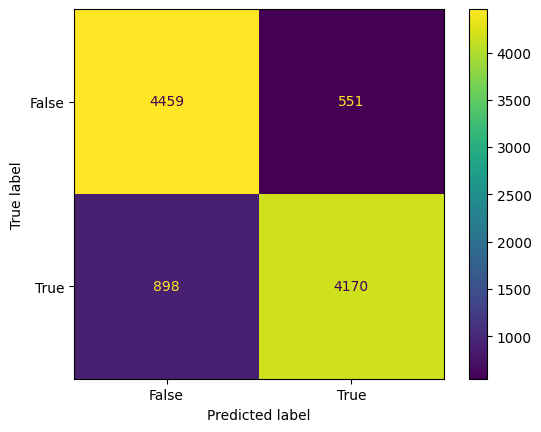

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(n_estimators=400, random_state=32)
# fiting the model to data
rf.fit(X_train, y_train)
#print(rf.score(X_train,y_train))
y_pred_rf = rf.predict(X_test)
clf_report = classification_report(y_test, y_pred_rf)
print(f"Classification Report : \n{clf_report}")
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_rf)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

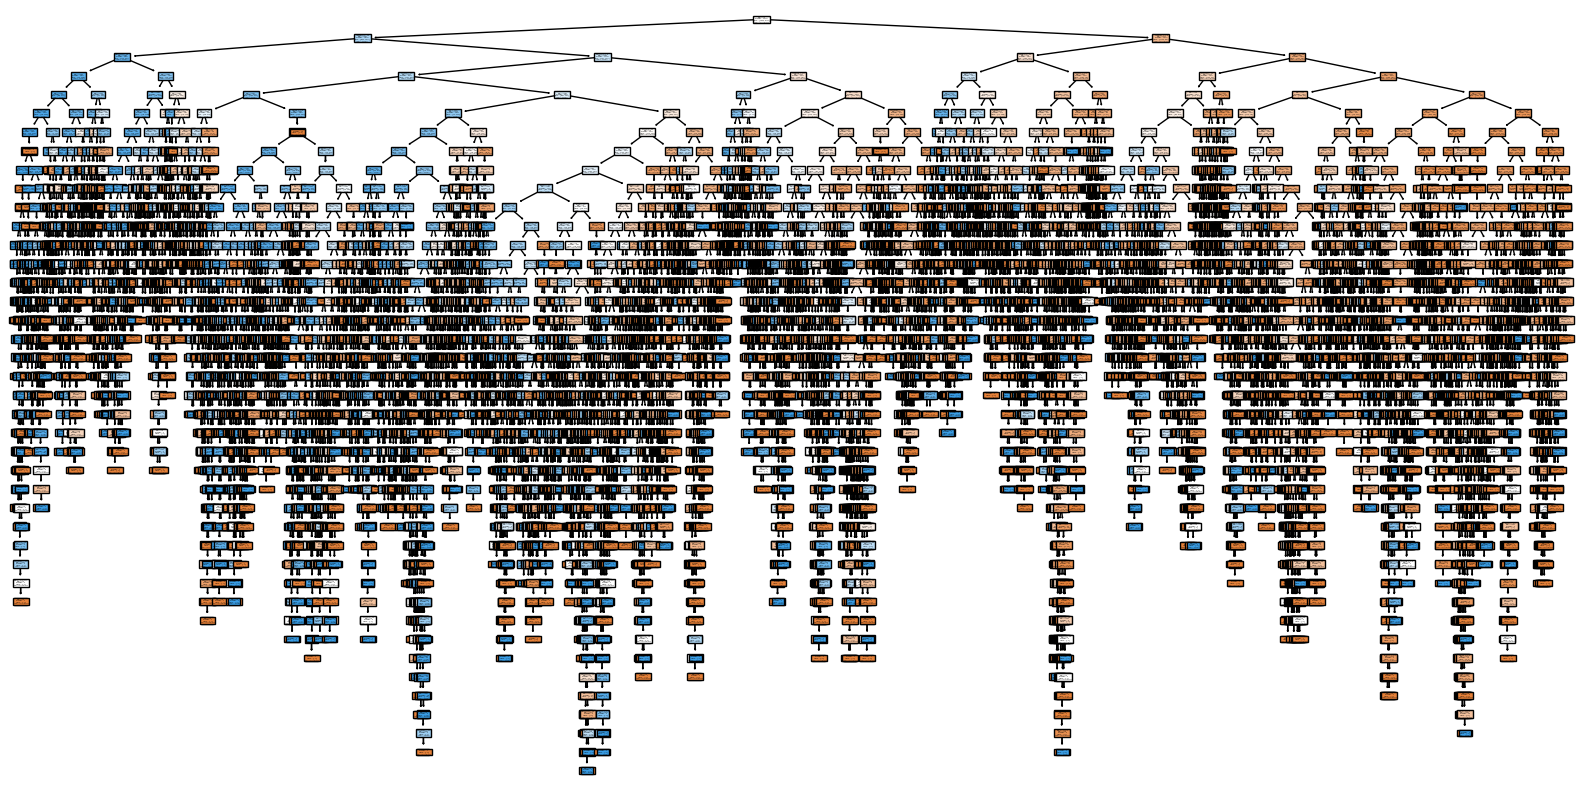

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import pydot
import numpy as np

# Identify the most important feature(s)
important_features = np.argsort(rf.feature_importances_)[-1]  # For demonstration, considering only the most important feature

# Find the index of a tree in the ensemble that uses the most important feature(s)
tree_index = np.argmax([tree.tree_.feature[0] == important_features for tree in rf.estimators_])

# Extract the most important tree from the ensemble
important_tree = rf.estimators_[tree_index]

# Visualize the most important tree
plt.figure(figsize=(20, 10))
plot_tree(important_tree, feature_names=X_train.columns, class_names=['Non-Abusers','Abusers'], filled=True)
plt.show()


In [10]:
rf.estimators_[0].tree_.max_depth

40

In [11]:
#Redesigning the model for a better visualization
rfdepth = RandomForestClassifier(n_estimators=50, max_depth=3)
# fiting the model to data
rfdepth.fit(X_train, y_train)
#print(rf.score(X_train,y_train))
y_pred_rf = rfdepth.predict(X_test)
clf_report = classification_report(y_test, y_pred_rf)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      5010
           1       0.75      0.74      0.75      5068

    accuracy                           0.75     10078
   macro avg       0.75      0.75      0.75     10078
weighted avg       0.75      0.75      0.75     10078



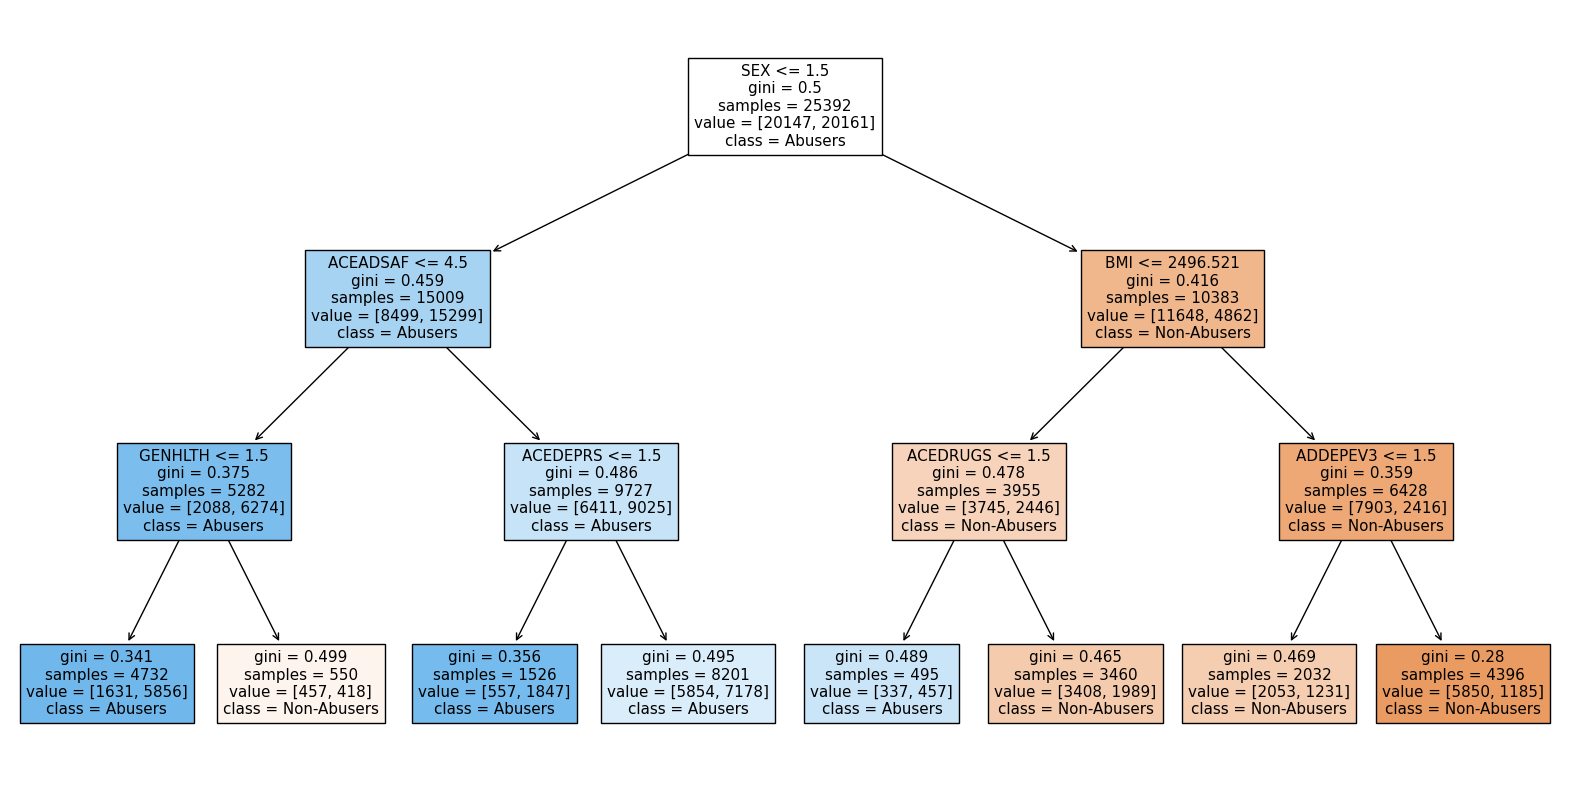

In [12]:
# Identify the most important feature(s)
important_features = np.argsort(rfdepth.feature_importances_)[-1]  # For demonstration, considering only the most important feature

# Find the index of a tree in the ensemble that uses the most important feature(s)
tree_index = np.argmax([tree.tree_.feature[0] == important_features for tree in rfdepth.estimators_])

# Extract the most important tree from the ensemble
important_tree = rfdepth.estimators_[tree_index]

# Visualize the most important tree
plt.figure(figsize=(20, 10))
plot_tree(important_tree, feature_names=X_train.columns, class_names=['Non-Abusers','Abusers'], filled=True)
plt.show()


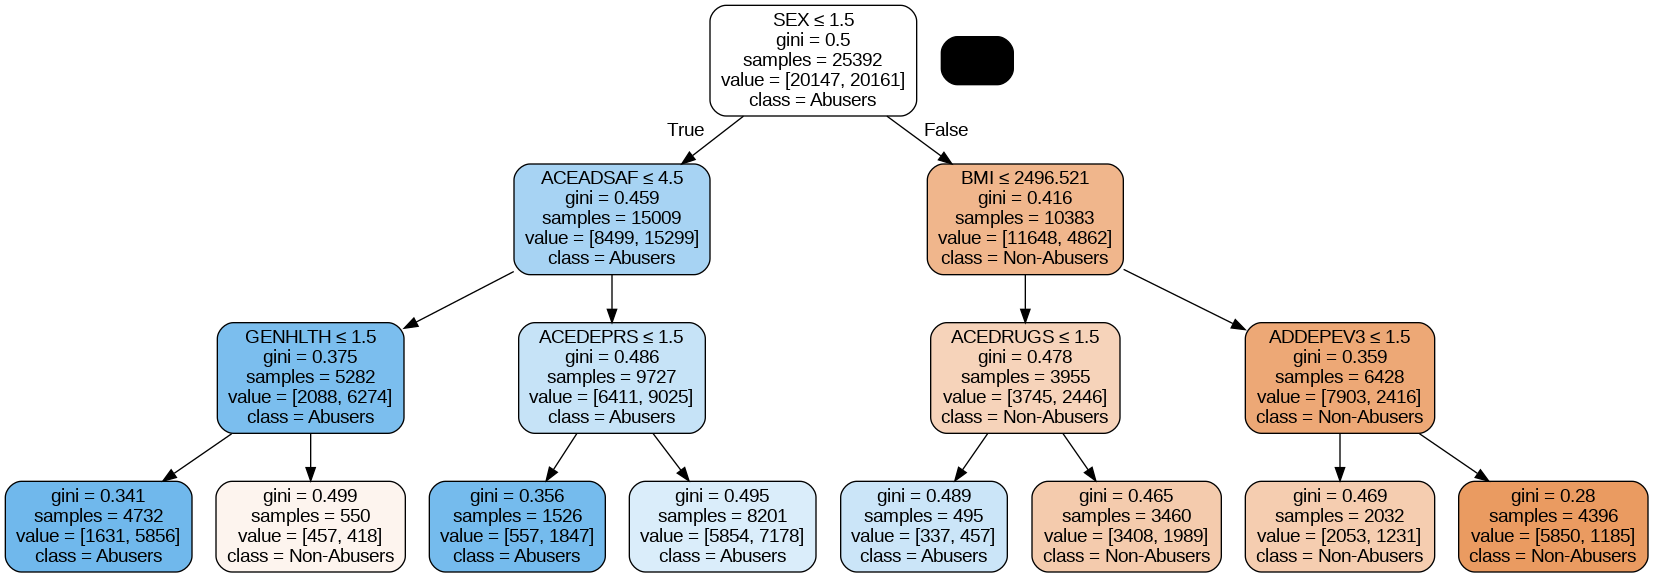

In [13]:

from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image, display

# Export the tree to DOT format
dot_data = export_graphviz(important_tree, out_file=None, feature_names=X_train.columns, class_names=['Non-Abusers', 'Abusers'], filled=True, rounded=True, special_characters=True)

# Convert to a graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Save the graph as a PNG file
image_path = "/content/drive/MyDrive/Capstone_Project/Backup/important_tree.png"
graph.write_png(path=image_path)

# Display the image
display(Image(filename=image_path))